In [1]:

import matplotlib.pyplot as plt 
import seaborn as sns

1. **Data Exploration**:

   - Load the penguins dataset using seaborn's `load_dataset` function. If seaborn is not installed
   - Display the first 10 rows of the dataset to understand its structure.

In [4]:
penguins_df = sns.load_dataset('penguins')

penguins_df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN



   - Use the `.describe()` method to get a statistical summary of the numerical columns in the dataset.

In [5]:
penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


2. **Data Filtering**:
   - Filter the dataset to include only those penguins with a body mass greater than 4000 grams. Store this subset in a new DataFrame and display the first 5 rows.

In [6]:
small_penguins_df = penguins_df[penguins_df['body_mass_g'] > 4000]
small_penguins_df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,Male
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male


3. **Conditional Filtering**:
   - Create a subset of the data where the penguin's bill length is between 40 mm and 50 mm, and the bill depth is less than 18 mm. Display the shape of the resulting DataFrame.

In [10]:
medium_bills_df = penguins_df[(penguins_df['bill_length_mm'] > 40) & (penguins_df['bill_length_mm'] < 50) & (penguins_df['bill_depth_mm'] < 18)]
medium_bills_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 12 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            129 non-null    object 
 1   island             129 non-null    object 
 2   bill_length_mm     129 non-null    float64
 3   bill_depth_mm      129 non-null    float64
 4   flipper_length_mm  129 non-null    float64
 5   body_mass_g        129 non-null    float64
 6   sex                125 non-null    object 
dtypes: float64(4), object(3)
memory usage: 8.1+ KB


4. **Data Grouping and Aggregation**:
   - Group the dataset by `species` and `island`, and calculate the average `flipper_length_mm` for each group. Sort the results in descending order of flipper length.

In [15]:
grouped_by_species_and_island_df = penguins_df.groupby(['species', 'island']).mean('flipper_length_mm').sort_values(by='flipper_length_mm', ascending=False)

grouped_by_species_and_island_df

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island                                                        
Gentoo    Biscoe          47.504878      14.982114         217.186992   
Chinstrap Dream           48.833824      18.420588         195.823529   
Adelie    Torgersen       38.950980      18.429412         191.196078   
          Dream           38.501786      18.251786         189.732143   
          Biscoe          38.975000      18.370455         188.795455   

                     body_mass_g  
species   island                  
Gentoo    Biscoe     5076.016260  
Chinstrap Dream      3733.088235  
Adelie    Torgersen  3706.372549  
          Dream      3688.392857  
          Biscoe     3709.659091


5. **Advanced Visualization**:
   - Create a histogram to visualize the distribution of penguin body masses. Use different colors to differentiate between the species. Ensure your histogram is clearly labeled with a title, x-axis and y-axis labels, and a legend.

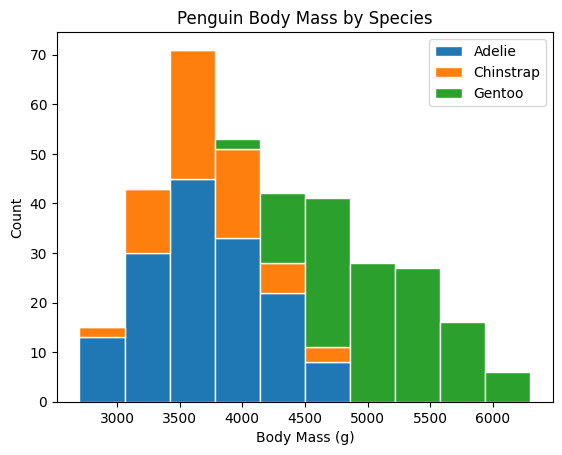

In [16]:
plt.hist([penguins_df[penguins_df['species'] == 'Adelie']['body_mass_g'], penguins_df[penguins_df['species'] == 'Chinstrap']['body_mass_g'], penguins_df[penguins_df['species'] == 'Gentoo']['body_mass_g']],
    stacked=True,
    label=['Adelie', 'Chinstrap', 'Gentoo'],
    edgecolor='white')

plt.legend()
plt.xlabel('Body Mass (g)')
plt.ylabel('Count')
plt.title('Penguin Body Mass by Species')
plt.show()

6. **Utilizing Loops for Visualization**:
   - Using the `zip` function learned this week, write a loop to create a separate histogram for each island showing the distribution of flipper lengths. Ensure each histogram has a title indicating the island being visualized, and clearly label your axes.

C:\Users\emmaf\AppData\Local\Temp\ipykernel_9940\1134091039.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


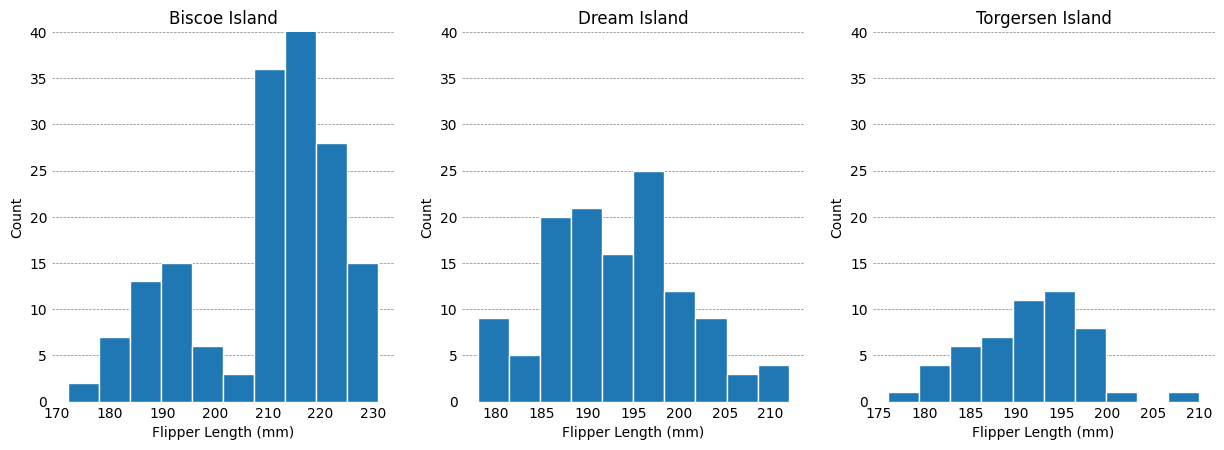

In [39]:
islands = ['Biscoe','Dream','Torgersen']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

for island, ax in zip(islands, [ax1, ax2, ax3]):
    ax.set_axisbelow(True)

    flipper_lengths = penguins_df[penguins_df['island'] == island]['flipper_length_mm']
    ax.hist(flipper_lengths, edgecolor='white')
    ax.set_title(f"{island} Island")
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Count')
    ax.spines[:].set_visible(False)
    ax.set_ylim(0,40)

    ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
    # Remove tick marks but keep the labels
    ax.tick_params(axis='both', which='both', length=0) 

fig.set_figwidth(15)
fig.show()